In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

from IPython.display import display, HTML
display(HTML("<style>.container {width:85%;}</style>"))

## OLS assumptions

| No | OLS Model Assumption                                                                                                                                                              | Implication of Violation                                                                                                       | Graphical Test                 | Test                   |
|----|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|-------------------------------|------------------------|
| 1  | Linear in parameters: There should be a linear relationship between the dependent variable and each of the independent variable                                               | "Misleading coefficients<br>change the functional form of the regression, which can be done by taking non-linear transformations of independent variables "     | Scatter plot of dependent vs. independent variables | Non-linearity tests (e.g., polynomial regression, GAM) |
| 2  | The error term has a population mean of zero                                                                                                                                     | "Suppose the average error is +7. This non-zero average error indicates that our model systematically underpredicts the observed values.<br>You don’t need to worry about this assumption when you include the constant in your regression model because it forces the mean of the residuals to equal zero." |                               |                        |
| 3  | All independent variables are uncorrelated with the error term:<br>If an independent variable is correlated with the error term, we can use the independent variable to predict the error term, which violates the notion that the error term represents unpredictable random error<br>This assumption is also referred to as exogeneity. When this type of correlation exists, there is endogeneity.<br>Violations of this assumption can occur because<br>√ there is simultaneity between the independent and dependent variables, <br>√ omitted variable bias, or <br>√ measurement error in the independent variables." | "Violating this assumption biases the coefficient estimate<br>when an independent variable correlates with the error term, OLS incorrectly attributes some of the variance that the error term actually explains to the independent variable instead" | Residual plot<br>Residuals over time                   | Durbin-Watson test, Ljung-Box test                |
| 4  | Independence of error terms (no autocorrelation): The error terms should not be correlated with each other                                                                    | Unreliable coefficient estimates, invalid inferences                                                                           | Autocorrelation plot           | Durbin-Watson test, Ljung-Box test                |
| 5  | Homoscedasticity: The variance of the residuals should be constant across all levels of the independent variables<br>Note: When assumption 4 (no autocorrelation) and 5 (homoscedasticity) are both true, statisticians say that the error term is independent and identically distributed (IID) and refer to them as spherical errors. | Incorrect standard errors which means incorrect confidence intervals,<br>unreliable hypothesis tests<br>Typically, if the data set is large, then errors are more or less homoscedastic | Residual plot                  | Breusch-Pagan test, White test                   |
| 6  | No multicollinearity (No independent variable is a perfect linear function of other explanatory variables)<br>Almost a sure indication of the presence of multi-collinearity is when you get opposite (unexpected) signs for your regression coefficients | reduces the precision of the estimates in OLS linear regression.                                                               | correlation matrix             | Variance Inflation Factor |
| 7  | Normality of error terms: The error terms should follow a normal distribution with mean of 0<br>OLS does not require that the error term follows a normal distribution to produce unbiased estimates with the minimum variance. However, satisfying this assumption allows you to perform statistical hypothesis testing and generate reliable confidence intervals and prediction intervals.<br>If you need to obtain p-values for the coefficient estimates and the overall test of significance, check this assumption! | "Incorrect standard errors;<br>OLS model nolonger BLUE;<br>Sometimes errors are not normal because the linearity assumption is not holding." | Histogram, Q-Q plot            | Shapiro-Wilk test, Anderson-Darling test         |


## Data

In [3]:
selct_columns = ['lwage', 'exper', 'expersq', 'educ',  'age', 'kidslt6', 'kidsge6']
df = (
    pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta')
    .filter(selct_columns)
    .dropna()
    .assign(educgr = lambda X: pd.cut(X["educ"], bins = [5,11,13, 18], labels=('Diploma','Degree','Masters'), ordered=True))
)

## Base model

In [36]:
olsModelBase = smf.ols('lwage ~ exper  + educ + age + kidslt6 + kidsge6', data = df).fit()

print(olsModelBase.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     14.98
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.52e-13
Time:                        00:18:41   Log-Likelihood:                -433.15
No. Observations:                 428   AIC:                             878.3
Df Residuals:                     422   BIC:                             902.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2190      0.300     -0.729      0.4

### Model interpretation

| Metric                              | Interpretatiion                                           |
|-------------------------------------|-------------------------------------------------------------|
| R-squared                           | Model explains approximately 15% of the variation in wage |
| Adj. R-squared                      | Modification of the R-squared that takes into account the number of independent variables in the model. It penalizes the addition of unnecessary variables that do not improve the model's fit significantly |
| Prob (F-statistic)                  | The coefficients are collectively significant at the 5% level of significance |
| AIC/BIC                             | Useful for comparing different models; lower values are preferred|
| Coef P-values                       | Experience, education are statistically significant in predicting wage at the 5% level of significance |
|                                     | Increase in the level of education by 1 unit while keeping other factors constant on average increases wage by 11% |
|                                     | Increase in experience by 1 unit while keeping other factors constant on average increases wage by approximately 1.6% |
| Prob(Omnibus)                       | Residuals not normally distributed                         |
| Durbin-Watson                       | No auto-correlation                                          |
| Cond. No                            | No multicollinearity between independent variables         |


<ol>
    <li style="margin-left: 400px;"> $ R^{2} = \frac{Explained \quad Variation}{Total \quad Variation} = \frac{SSR}{SST}$ </li><br>
    <li style="margin-left: 400px;"> 
        $ Adjusted  R^{2} = 1 - (1 -  R^{2})\frac{n-1}{n-k-1}$ 
        <P style="margin-left: 30px;">
            <i>where;
            <ul style="margin-left: 30px;">
                <li><i>n is the number of observations (sample size).</li>
                <li><i>k is the number of independent variables in the model.</li>
            </ul>
        </p> 
    </li>
</ol>




### Intepreting categorical factors in the model
- The categories are intepreted with respect to the base category which is excluded from the model

In [37]:
olsModelCat = smf.ols('lwage ~ exper + educgr + age + kidslt6 + kidsge6', data = df).fit()

print(olsModelCat.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     9.262
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.53e-09
Time:                        00:18:44   Log-Likelihood:                -440.76
No. Observations:                 427   AIC:                             895.5
Df Residuals:                     420   BIC:                             923.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9455      0.24

| Interpretation                                                                 |
|-------------------------------------------------------------------------------|
| Degree holders earn on average 25% more wage than those with diplomas         |
| Master holders earn on average 62% more wage than those with diplomas         |


### Interpreting non linear terms of the independent variable
- I add to the model experience squared (Polynomials of order 2) to the base model and investigate impact

In [4]:
olsModelNonLinear = smf.ols('lwage ~ exper + I(exper**2)  + educ + age + kidslt6 + kidsge6', data = df).fit()

print(olsModelNonLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     13.19
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.06e-13
Time:                        17:44:20   Log-Likelihood:                -431.24
No. Observations:                 428   AIC:                             876.5
Df Residuals:                     421   BIC:                             904.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4209      0.317     -1.328

| Observation                                                                                       |
|---------------------------------------------------------------------------------------------------|
| With the presence of both experience and squared experience, the condition number is now very high and the model results warn that there might be multicollinearity. |

I visualize the effects of experience on wage under the current model specification with other factors fixed constant. 

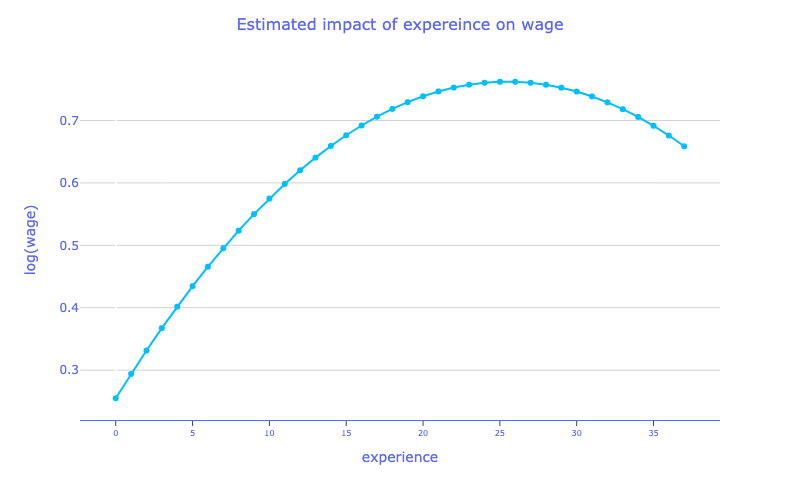

In [5]:
df_exp = (
    pd.DataFrame( {'X':np.arange(38)})
    .assign(
        Y = lambda X: X['X'].apply(lambda x: olsModelNonLinear.params['Intercept'] + 
                                   olsModelNonLinear.params['exper']*x + 
                                   olsModelNonLinear.params['I(exper ** 2)']*(x**2) + 
                                   olsModelNonLinear.params['educ']*12.6 + 
                                   olsModelNonLinear.params['age']*42 + 
                                   olsModelNonLinear.params['kidslt6']*0.1402 + 
                                   olsModelNonLinear.params['kidsge6']*42 
                                  )
    )
)

fig = px.line(df_exp, x="X", y="Y", markers=True, color_discrete_sequence=["deepskyblue"])
fig.update_layout(
    width=800,
    plot_bgcolor="white",
    font=dict(size=12, color="#5b68f6"),
    title=dict(text="Estimated impact of expereince on wage", x=0.5, xanchor="center", font=dict(size=16, color="#5b68f6")),
    yaxis=dict(showline=False, linecolor="#5b68f6", linewidth=1, showgrid=True, gridcolor="lightgray",title="log(wage)"),
    xaxis=dict(linecolor="#5b68f6", linewidth=1, showgrid=False, ticks="outside", title="experience", tickfont=dict(size=8)),
    legend=dict(orientation="h", x=0.5, y=1.01)
)
fig.show("png")

## Reporting all models

In [40]:
results = Stargazer([olsModelBase, olsModelCat, olsModelNonLinear])

# asign model names
results.custom_columns(
                       # model names
                       ['Base model', 'Model with categorical variables', 'Model with non-linear terms model'],
                       [1, 1, 1],
                    )
results.show_model_numbers(False)

results